## Регрессия

Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

### 1.1 Теоретический материа - линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

### 1.1.1 Пример
Проведем прямую y=mx+b

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

#Перепишем линейное уравнение y=mx+c как
#y=Ap
#где A=[[x 1]] и p=[[m],[c]]
#Построим A по x

A=np.vstack([x,np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [6]:
#Используем метод lstsq для решения его относительно вектора p
m,c = np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)

0.9999999999999999 -0.9499999999999997


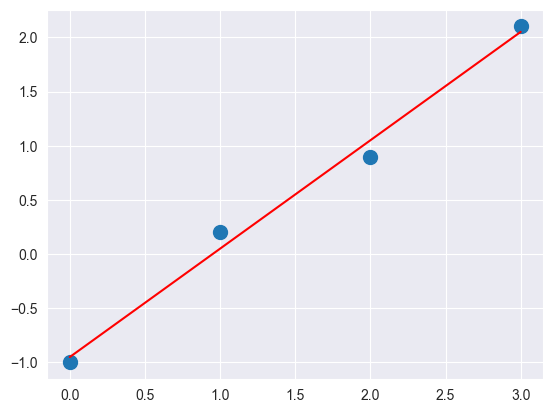

In [7]:
#Построим график полученной прямой и укажем на нем точки
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')

### 1.1.2 Пример
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные могут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла

In [14]:
from numpy import *
from numpy.random import *

#gen random x y
delta = 1.0
x=linspace(-5,5,11)
y=x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

#write to file
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

In [15]:
#read from file
x = fromfile('x_data.txt',float,sep='\n')
y = fromfile('y_data.txt',float,sep='\n')

print(x)
print(y)

[-4.61896505 -3.71006341 -2.66167034 -1.78105408 -0.60737792  0.18020923
  1.23676646  2.32843766  2.93049315  4.07475855  4.58962726]
[2.46848264e+01 1.61004734e+01 9.11886587e+00 4.48911510e+00
 1.19300015e+00 1.66813326e-02 1.09766650e+00 4.19374837e+00
 9.38350940e+00 1.58944614e+01 2.53635485e+01]


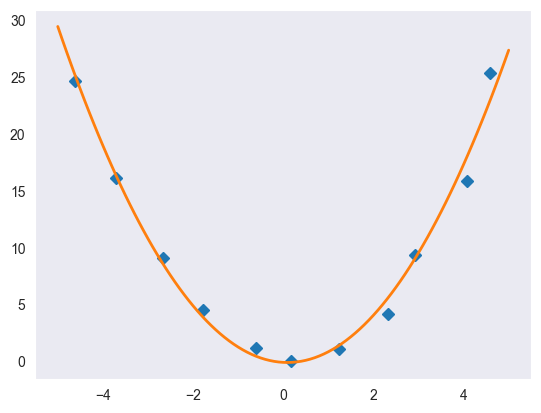

In [16]:
#Нахождение коэффециентов функции вида y=ax^2+bx+c с методом наименьших квадратов задаем вектор
#m=[x*2,x,E]
m=vstack((x**2,x,ones(11))).T
#Находим коэффициенты при составляющих вектора m
s=np.linalg.lstsq(m,y,rcond=None)[0]

#на отрезке [-5,5]
x_prec=linspace(-5,5,101)
#draw points
plt.plot(x,y,'D')
#рисуем кривую вида y=ax^2+bx+c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('parabola.png')

### 1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

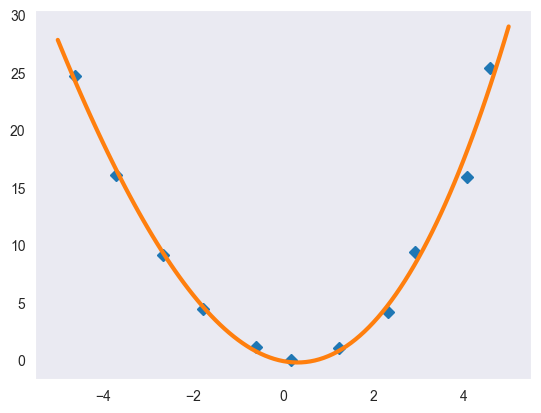

In [22]:
#Нахождение коэффициентов функции вида y=ax^3+bx^2+cx+d методом наименьших квадратов
m=vstack((x**3,x**2,x,ones(11))).T

s=np.linalg.lstsq(m,y,rcond=None)[0]

x_prec=linspace(-5,5,101)

plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()

### Задание
Представьте собственные данные и постройте экстраполяцию полиномами
первой, второй и третьей степени.

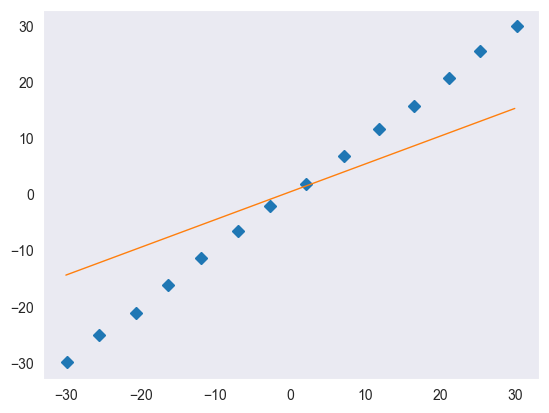

In [58]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt

delta=1.0
x1=linspace(-30,30,14)
x2=linspace(-30,30,14)
x3=linspace(-30,30,14)
y1=x+delta*(rand(14)-0.5)
y2=x**2+delta*(rand(14)-0.5)
y3=x**3+delta*(rand(14)-0.5)

x1 += delta*(rand(14)-0.5)
x2 += delta*(rand(14)-0.5)
x3 += delta*(rand(14)-0.5)
#print(x)
#print(x1,y1)
#print(x2,y2)
#print(x3,y3)

m1=vstack((x1,x1,ones(14))).T
m2=vstack((x2**2,x2,ones(14))).T
m3=vstack((x3**3,x3,ones(14))).T

s1 = np.linalg.lstsq(m1,y1,rcond=None)[0]
s2 = np.linalg.lstsq(m2,y2,rcond=None)[0]
s3 = np.linalg.lstsq(m3,y3,rcond=None)[0]

x_prec=linspace(-30,30,14)

plt.plot(x1,y1,'D')
#ax+b
plt.plot(x_prec,s1[0]*x_prec+s1[1],'-',lw=1)
plt.grid()

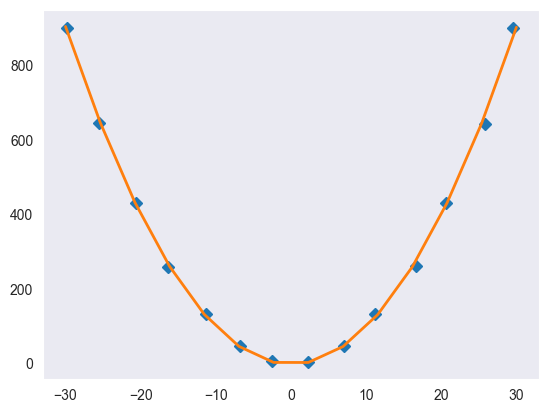

In [59]:
plt.plot(x2,y2,'D')
#y=ax2+bx+c
plt.plot(x_prec,s2[0]*x_prec**2+s2[1]*x_prec+s2[2],'-',lw=2)
plt.grid()

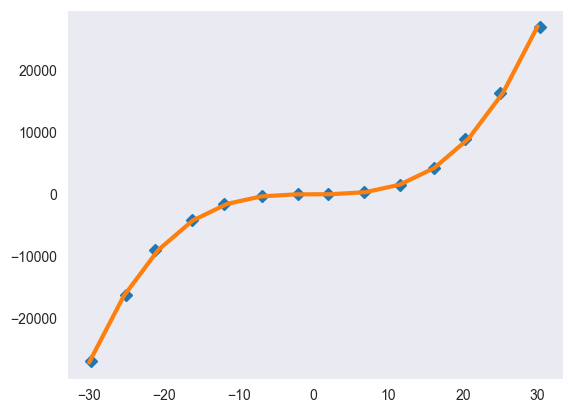

In [60]:
plt.plot(x3,y3,'D')
#y=ax3+bx2+cx+d
plt.plot(x_prec,s2[0]*x_prec**3+s2[1]*x_prec**2+s2[2],'-',lw=3)
plt.grid()

### 1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)


In [63]:
beta = (0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)

#points array
xdata = np.linspace(0,5,50)
#without noise
y=f(xdata,*beta)
#add noise
ydata = y+0.05*np.random.randn(len(xdata))
#print(ydata)

[1.01351895 0.99009236 0.87433672 0.84649862 0.9851986  0.91953084
 0.9581512  0.82830362 0.77298095 0.71552664 0.69207773 0.64950661
 0.64383213 0.60246511 0.48439364 0.51164041 0.49347525 0.33635111
 0.45686746 0.40407672 0.34521833 0.27251143 0.28667523 0.26268531
 0.34593865 0.2880152  0.38841756 0.27208567 0.2155119  0.34002019
 0.25346119 0.31408835 0.2464821  0.26750322 0.26403868 0.27503433
 0.2465195  0.29745542 0.26444914 0.26825789 0.27422014 0.2314414
 0.27534583 0.17463427 0.23697947 0.23867535 0.20103139 0.29555006
 0.22899468 0.27737259]


In [64]:
#используем функцию для получения решения в виде коэффициентов функции f(x)
import scipy as sp
from scipy.optimize import curve_fit
beta_opt,beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt

array([0.25668854, 0.72202559, 0.47153582])

In [66]:
#Линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata-f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

0.0002004366546110731
0.10199712310429439


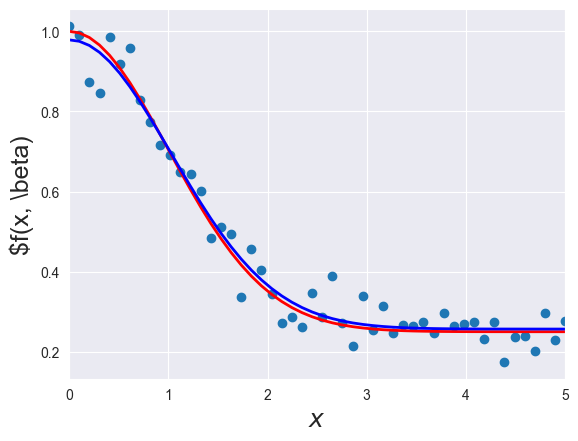

In [68]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata, f(xdata, *beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)", fontsize=18)
plt.show()

In [69]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.01351895 0.99009236 0.87433672 0.84649862 0.9851986  0.91953084
 0.9581512  0.82830362 0.77298095 0.71552664 0.69207773 0.64950661
 0.64383213 0.60246511 0.48439364 0.51164041 0.49347525 0.33635111
 0.45686746 0.40407672 0.34521833 0.27251143 0.28667523 0.26268531
 0.34593865 0.2880152  0.38841756 0.27208567 0.2155119  0.34002019
 0.25346119 0.31408835 0.2464821  0.26750322 0.26403868 0.27503433
 0.2465195  0.29745542 0.26444914 0.26

### 1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1


[0.26378113 0.74606859]
0.00011273493570604834
0.09912899483106165


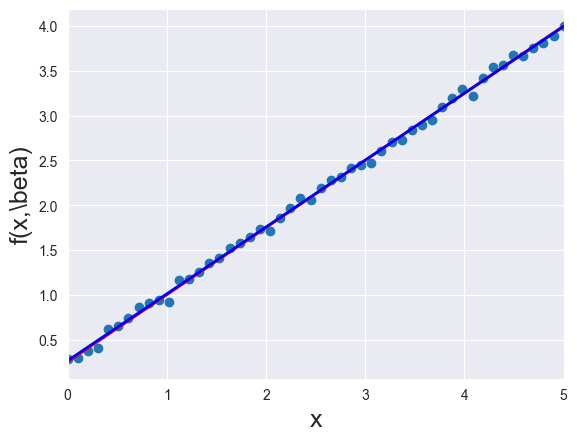

[0.26345551 0.74051626 0.50130338]
0.0001449852931313616
0.12090256433228254


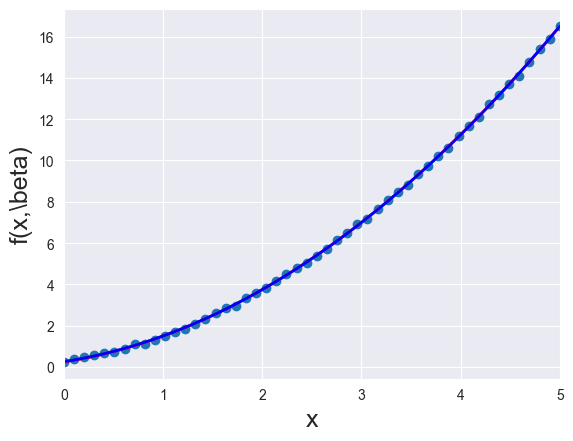

[1.02936191 1.97294307]
4.0307616605173555e-05
0.09320900654153891


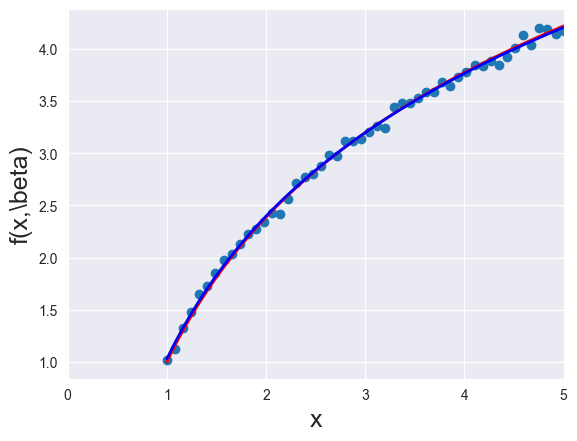

[0.99798533 2.00183463]
4.955495569680638e-06
0.11885449773245982


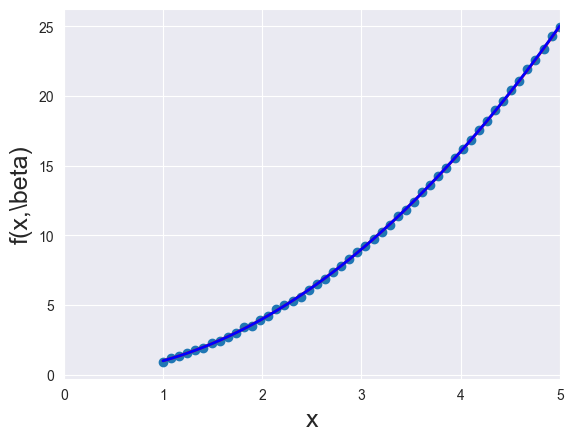

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from numpy.random import *
#решение
#1
#Добавим шума 6 данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"f(x,\beta)", fontsize=18)
plt.show()

#Решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"f(x,\beta)", fontsize=18)
plt.show()

#Решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (1,2)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"f(x,\beta)", fontsize=18)
plt.show()

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (1,2)
def f(x, b0, b1):
  return b0 * x **b1
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = f(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"f(x,\beta)", fontsize=18)
plt.show()

### Задание
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[0.89912683 0.65886732]
359908674.87025005
0.09788294464195398


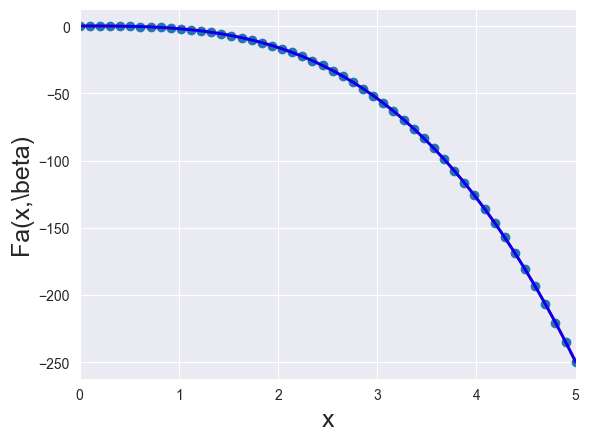

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from numpy.random import *
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.4, 0.85)

def Fa(x,b0,b1):
    return b0*b1**3-2*x**3
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = Fa(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(Fa, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - Fa(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, Fa(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"Fa(x,\beta)", fontsize=18)
plt.show()

[0.24779862 1.55904804 0.36063985]
-0.6616700537779652
0.21868767191299063


C:\Users\srdhe\AppData\Local\Temp\ipykernel_7904\1565140271.py:6: RuntimeWarning: divide by zero encountered in power
  return x**b0-x**(2*b1)*x**(3*b2)
C:\Users\srdhe\AppData\Local\Temp\ipykernel_7904\1565140271.py:6: RuntimeWarning: overflow encountered in power
  return x**b0-x**(2*b1)*x**(3*b2)
C:\Users\srdhe\AppData\Local\Temp\ipykernel_7904\1565140271.py:6: RuntimeWarning: invalid value encountered in multiply
  return x**b0-x**(2*b1)*x**(3*b2)


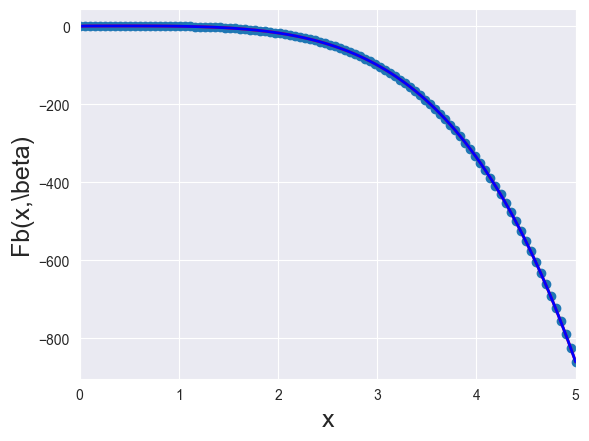

In [91]:

#Решение
#2
#Добавим шума в данные, сделанные по функции Fb(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.9)
def Fb(x, b0, b1, b2):
  return x**b0-x**(2*b1)*x**(3*b2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 100)
# создаем теоретически правильные значения точек yi (без шума)
у = Fb(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(Fb, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - Fb(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, Fb(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"Fb(x,\beta)", fontsize=18)
plt.show()


[0.99978637 1.99943454]
9.337981975575089e-06
0.09999580963702516


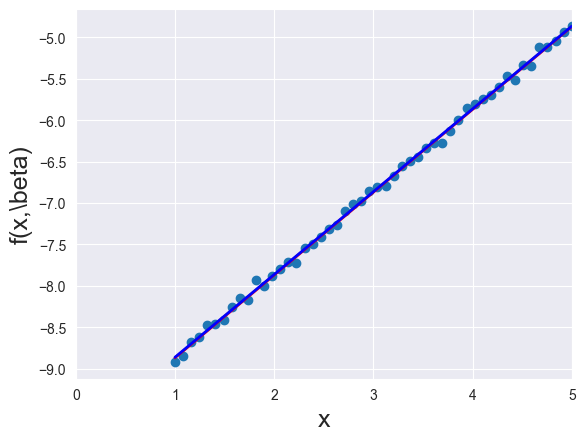

In [93]:

#Решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (1,2)
def fc(x, b0, b1):
  return x**b0-np.pi**b1
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = fc(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(fc, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - fc(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, fc(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"f(x,\beta)", fontsize=18)
plt.show()


[0.99899152 1.99989283]
3.0275470280861766e-07
0.11585139553305022


C:\Users\srdhe\AppData\Local\Temp\ipykernel_7904\3132505076.py:6: RuntimeWarning: invalid value encountered in power
  return 9*b0**x - 7*b1**x


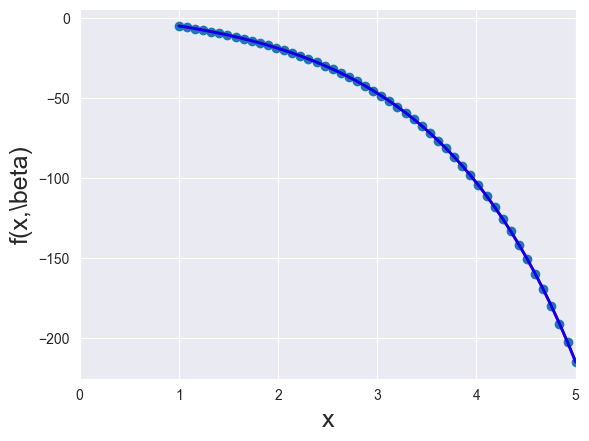

In [97]:

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (1,2)
def fd(x, b0, b1):
  return 9*b0**x - 7*b1**x
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
у = fd(xdata, *beta)
# зашумляем эти данные
ydata = у + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(fd, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - fd(xdata,*beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, у, 'r', lw=2)
ax.plot(xdata, fd(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize=18)
ax.set_ylabel(r"f(x,\beta)", fontsize=18)
plt.show()

## 1.2 Задачи регрессии
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

### 1.2.1 Пример
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания @заимосвязи между бременем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.00, 5.50],
'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()


,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [101]:
#Исследуем набор данных
print(dataset.shape)
dataset.describe()


(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


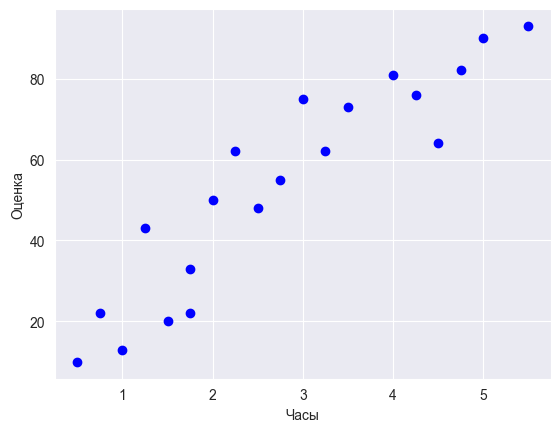

In [102]:

# Нарисуем точечную диаграмму

plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [103]:
X = dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [105]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [106]:
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:


In [107]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


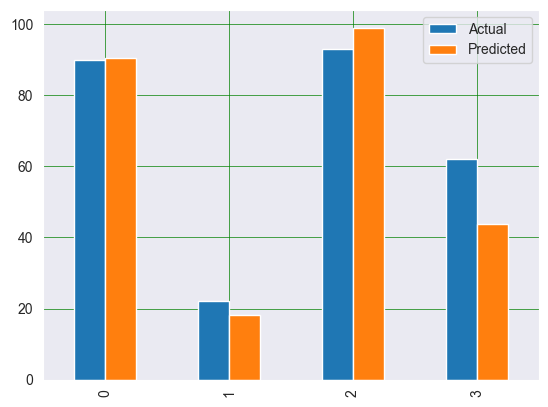

In [109]:
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

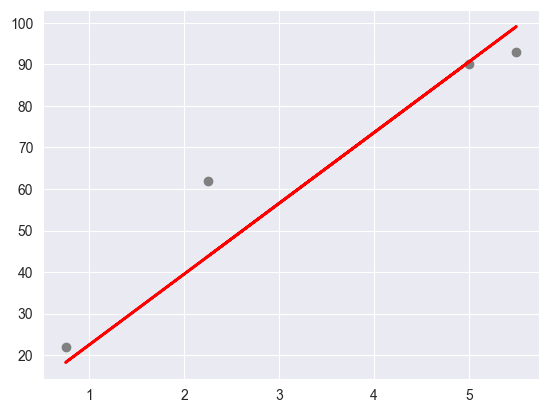

In [110]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)
data.head(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [115]:
print(data.shape)
data.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


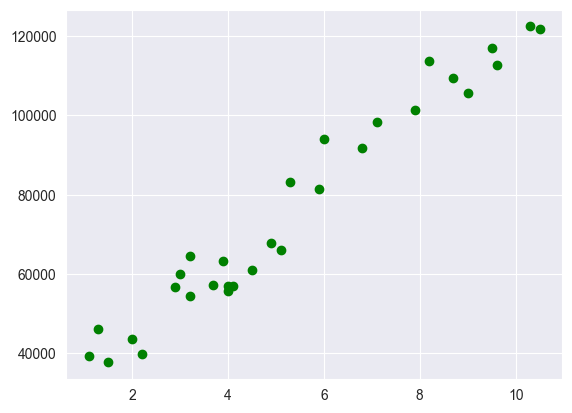

In [118]:
plt.scatter(data['YearsExperience'], data['Salary'],color='g',label='Salary/XP Growth')
plt.xlabel='Years'
plt.ylabel='Salary'
plt.show()

In [125]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [126]:
trainx,testx, trainy,testy = train_test_split(X,Y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(trainx,trainy)

LinearRegression()

In [127]:
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [129]:
#prediction
predy = regressor.predict(testx)
frame = pd.DataFrame({"From CSV":testy,"Prediction":predy})
frame

,From CSV,Prediction
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


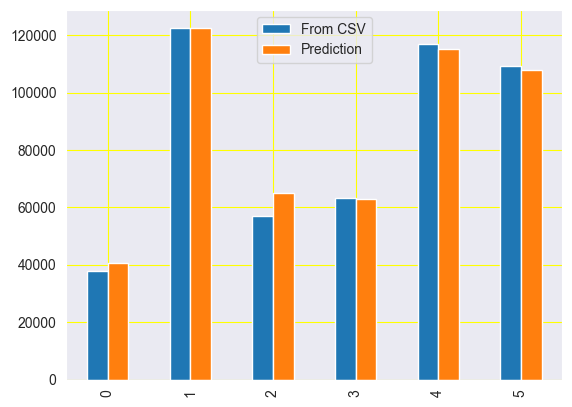

In [131]:
#visual
frame.plot(kind='bar')

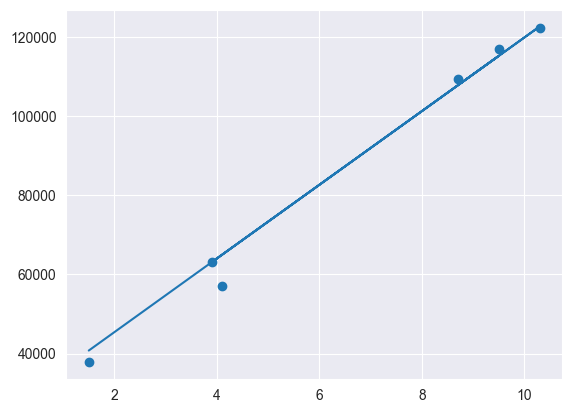

In [133]:
#Regression show
plt.scatter(testx,testy)
plt.plot(testx,predy)
plt.show()

### 1.3 Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

### 1.3.1 Пример
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [134]:
import numpy as np

Y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
  [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
  [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X)
X = np.c_[X,np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X,Y,rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


### 1.3.2 добавляем scipy
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
  [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
  [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

newy = np.array(Y)
newy = newy.transpose()
framey = pd.DataFrame(newy)

newx = np.array(X)
newx=newx.transpose()
framex = pd.DataFrame(newx)

framey = framey.rename(columns={0:'y'}, inplace=False)
framex = framex.rename(columns={0:'x1',1:'x2',2:'x3'},inplace=False)

frames = [framey,framex]
dataset = pd.concat([framey,framex],axis=1,join='inner')
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [136]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [141]:
X = dataset[['x1','x2','x3']]
Y=dataset['y']

In [142]:
trainx,testx,trainy,testy = train_test_split(X,Y,test_size=0.2, random_state=0)

In [143]:
regressor = LinearRegression()
regressor.fit(trainx,trainy)

LinearRegression()

In [145]:
cf = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
cf

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [146]:
predy = regressor.predict(testx)
df = pd.DataFrame({'Actual':testy,'Prediction':predy})
df

,Actual,Prediction
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [147]:
print('Mean Squared Error: ', metrics.mean_squared_error(testy,predy))

Mean Squared Error:  1.3272699242343065


## Задание
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv



In [148]:
import pandas as pd
import numpy as np

url ='https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
frame = pd.read_csv(url)
frame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [156]:
interested_frame = frame['quality']
inspect_frame = frame.loc[:,frame.columns!='quality']
inspect_frame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [159]:
framer = [interested_frame, inspect_frame]
dataset = pd.concat([interested_frame, inspect_frame],axis=1,join="inner")
dataset.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [160]:
print(dataset.shape)
dataset.describe()

(1599, 12)


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,5.636023,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,0.807569,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,3.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,5.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,6.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,6.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,8.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [173]:

trainx,testx,trainy,testy=train_test_split(inspect_frame,interested_frame,test_size=0.2,random_state=0)
agressor = LinearRegression()
agressor.fit(trainx,trainy)

coef = pd.DataFrame(agressor.coef_, inspect_frame.columns, columns=["Coef value"])
coef

,Coef value
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [174]:
predy = agressor.predict(testx)
df = pd.DataFrame({'CSV':testy,'Prediction':predy})
df

,CSV,Prediction
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


In [176]:
print('Mean SQ ERR: ', metrics.mean_squared_error(testy,predy))

Mean SQ ERR:  0.3844711978201246


### Задание
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

X: [0.  0.2 0.4 0.6 0.8 1. ]
Y: [5. 5. 4. 4. 6. 6.]
Coef X: -4.214285714285723 5.142857142857142
Coef Y: 5.357142857142868 -4.214285714285723 5.142857142857142


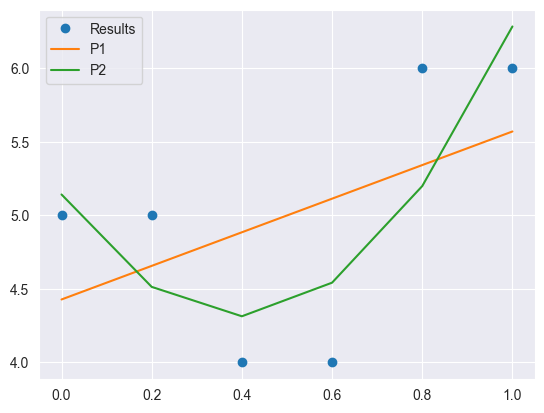

In [177]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])

A = np.vstack([x, np.ones(len(x))]).T
a1, a0 = np.linalg.lstsq(A, y, rcond=None)[0]
p1 = a0 + a1*x

A = np.vstack([x**2, x, np.ones(len(x))]).T
a2, a1, a0 = np.linalg.lstsq(A, y, rcond=None)[0]
p2 = a0 + a1*x + a2*x**2

print('X:', x)
print('Y:', y)
print('Coef X:', a1, a0)
print('Coef Y:', a2, a1, a0)

plt.plot(x, y, 'o', label='Results')
plt.plot(x, p1, label='P1')
plt.plot(x, p2, label='P2')
plt.legend()
plt.show()